In [134]:
import numpy as np
import pandas as pd

In [135]:
#loading the dataset
#dataset can be downloaded from https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles?resource=download
news_data= pd.read_csv("Articles.csv",encoding = "ISO-8859-1")
news_data=news_data.drop(labels=['Date'],axis=1)
news_data['Article']=news_data['Article']+news_data['Heading']
news_data=news_data.drop(labels=['Heading'],axis=1)

In [136]:
news_data.head()

,Article,NewsType
0,KARACHI: The Sindh government has decided to b...,business
1,HONG KONG: Asian markets started 2015 on an up...,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,business
4,NEW YORK: US oil prices Monday slipped below $...,business


In [137]:
news_data.isnull().sum() #No null data 

Article     0
NewsType    0
dtype: int64

In [124]:
pip install cleantext

Note: you may need to restart the kernel to use updated packages.


In [138]:
from cleantext import clean

#cleaning article data
def clean_data(text):
    text=text.replace("strong>",'')
    text=text.replace("</strong",'')
    return clean(text, extra_spaces=True, lowercase=True, numbers=True, punct=True, stemming=True)
    
news_data["Article"]=news_data["Article"].apply(clean_data)

In [139]:
#Splitting the data into 80% train 20% test data

from sklearn.model_selection import train_test_split

X = news_data['Article']
y = news_data['NewsType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconverter = TfidfVectorizer(max_features=5)
X_train_Tfidf = tfidfconverter.fit_transform(X_train).toarray()
X_test_Tfidf = tfidfconverter.transform(X_test).toarray()

X_train_Tfidf

array([[0.15109534, 0.20696522, 0.295253  , 0.89677597, 0.20725375],
       [0.44618653, 0.27780501, 0.39631183, 0.58244677, 0.47690109],
       [0.22025509, 0.48487159, 0.32279773, 0.68525234, 0.3776481 ],
       ...,
       [0.46915762, 0.35702003, 0.40745487, 0.59882336, 0.35751775],
       [0.25351532, 0.57876101, 0.41282522, 0.56626825, 0.33118164],
       [0.18923076, 0.55543248, 0.30814403, 0.52331574, 0.53560655]])

In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(
        n_clusters=2,
        max_iter=500,
        n_init=1,
        random_state=42,
    )
kmeans.fit(X_train_Tfidf)

KMeans(max_iter=500, n_clusters=2, n_init=1, random_state=42)

In [143]:
results = pd.DataFrame() 
results['Article'] = X_train
results['cluster'] = kmeans.labels_ 

results.to_csv("results.csv")

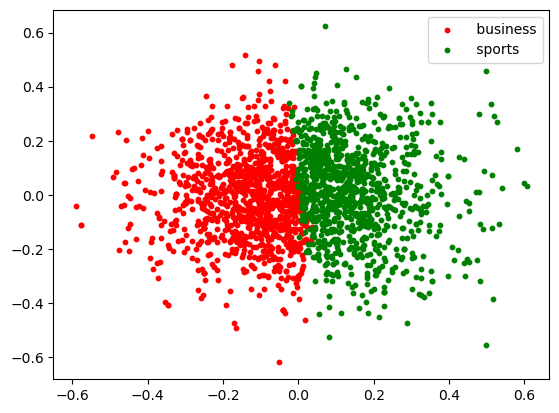

In [144]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_train_Tfidf) 

# plot the results 
colors = ['red', 'green'] 
cluster = ['business','sports'] 
for i in range(2): 
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1],  
                s=10, color=colors[i],  
                label=f' {cluster[i]}') 
plt.legend() 
plt.show()

In [132]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
X_train_Tfidf_df = pd.DataFrame(X_train_Tfidf)

nb.fit(X_train_Tfidf_df, y_train)


GaussianNB()

In [145]:
from sklearn.metrics import accuracy_score
X_test_Tfidf_df=pd.DataFrame(X_test_Tfidf_df)
y_pred = nb.predict(X_test_Tfidf_df)
accuracy_score(y_test, y_pred)


0.5324675324675324